In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import pickle

# Load your dataset
df = pd.read_csv("spam.csv")  # replace with your file
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# Vectorize the messages
vector = CountVectorizer()
x = vector.fit_transform(df['Message'])
y = df['Category']

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [22]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

# Optional: check accuracy
pred = clf.predict(x_test)
print(classification_report(pred, y_test))


              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1202
        spam       0.95      0.93      0.94       191

    accuracy                           0.98      1393
   macro avg       0.97      0.96      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [23]:
# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vector, f)


In [24]:
# Load model and vectorizer to test
with open("model.pkl", "rb") as f:
    clf_test = pickle.load(f)

with open("vectorizer.pkl", "rb") as f:
    vector_test = pickle.load(f)

sample = ["Free entry in 2 a wkly comp to win FA Cup!"]
sample_vector = vector_test.transform(sample)
print(clf_test.predict(sample_vector))


['spam']


In [25]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [26]:
pred=clf.predict(x_test)

In [27]:
from sklearn.metrics import classification_report
cr=classification_report(pred,y_test)
print(cr)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1202
        spam       0.95      0.93      0.94       191

    accuracy                           0.98      1393
   macro avg       0.97      0.96      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,y_test)
print(cm)

[[1193    9]
 [  14  177]]


<Axes: >

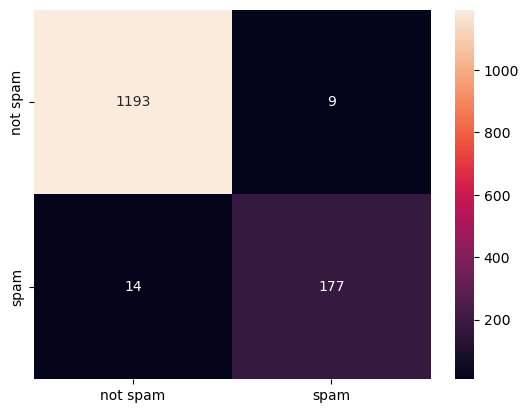

In [29]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['not spam','spam'],yticklabels=['not spam','spam'])